# Week 1

## Creating view for online sales

In [4]:
drop view vInternetSales;

Commands completed successfully.

Total execution time: 00:00:00.019

In [5]:
create view vInternetSales as
select 
    DimProduct.EnglishProductName [Product Name] 
  , CONCAT_WS(' ', DimCustomer.FirstName, DimCustomer.MiddleName, DimCustomer.LastName) [Customer Name]
  , DimPromotion.EnglishPromotionName [Promotion Name]
  , DimCurrency.CurrencyName [Currency Name]
  , DimSalesTerritory.SalesTerritoryCountry [Sales Territory Country]
  , [SalesOrderNumber]
  , [SalesOrderLineNumber]
  , [RevisionNumber]
  , [OrderQuantity]
  , [UnitPrice]
  , [ExtendedAmount]
  , [UnitPriceDiscountPct]
  , [DiscountAmount]
  , [ProductStandardCost]
  , [TotalProductCost]
  , [SalesAmount]
  , [TaxAmt]
  , [Freight]
  , [CarrierTrackingNumber]
  , [CustomerPONumber]
  , [OrderDate]
  , [DueDate]
  , [ShipDate]

from FactInternetSales fis
left join DimProduct
    on fis.ProductKey = DimProduct.ProductKey
left join DimCustomer
    on fis.CustomerKey = DimCustomer.CustomerKey
left join DimPromotion
    on fis.PromotionKey = DimPromotion.PromotionKey
left join DimCurrency
    on fis.CurrencyKey = DimCurrency.CurrencyKey
left join DimSalesTerritory
    on fis.SalesTerritoryKey = DimSalesTerritory.SalesTerritoryKey
;

Commands completed successfully.

Total execution time: 00:00:00.014

In [6]:
select top 10 * from vInternetSales;

(10 rows affected)

Total execution time: 00:00:00.012

Product Name,Customer Name,Promotion Name,Currency Name,Sales Territory Country,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
"Road-150 Red, 62",Cole A Watson,No Discount,Canadian Dollar,Canada,SO43697,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
"Mountain-100 Silver, 44",Rachael M Martinez,No Discount,French Franc,France,SO43698,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
"Mountain-100 Silver, 44",Sydney S Wright,No Discount,US Dollar,United States,SO43699,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
"Road-650 Black, 62",Ruben Prasad,No Discount,US Dollar,United States,SO43700,1,1,1,699.0982,699.0982,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
"Mountain-100 Silver, 44",Christy Zhu,No Discount,Australian Dollar,Australia,SO43701,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NULL,NULL,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
"Road-150 Red, 44",Colin G Anand,No Discount,US Dollar,United States,SO43702,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NULL,NULL,2010-12-30 00:00:00.000,2011-01-11 00:00:00.000,2011-01-06 00:00:00.000
"Road-150 Red, 62",Albert R Alvarez,No Discount,Australian Dollar,Australia,SO43703,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NULL,NULL,2010-12-30 00:00:00.000,2011-01-11 00:00:00.000,2011-01-06 00:00:00.000
"Mountain-100 Black, 48",Julio Ruiz,No Discount,Australian Dollar,Australia,SO43704,1,1,1,3374.9900,3374.9900,0,0,1898.0944,1898.0944,3374.9900,269.9992,84.3748,NULL,NULL,2010-12-30 00:00:00.000,2011-01-11 00:00:00.000,2011-01-06 00:00:00.000
"Mountain-100 Silver, 38",Curtis Lu,No Discount,Australian Dollar,Australia,SO43705,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NULL,NULL,2010-12-30 00:00:00.000,2011-01-11 00:00:00.000,2011-01-06 00:00:00.000
"Road-150 Red, 48",Edward Brown,No Discount,US Dollar,United States,SO43706,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NULL,NULL,2010-12-31 00:00:00.000,2011-01-12 00:00:00.000,2011-01-07 00:00:00.000


## Creating view for online sales (aggregated by month)

In [26]:
create view vMonthlySales as
select
    format(OrderDate, 'yyyy-MM') [Month], 
    sum(SalesAmount) [Sales Amount]
from FactInternetSales
group by format(OrderDate, 'yyyy-MM')
;

Commands completed successfully.

Total execution time: 00:00:00.025

In [1]:
select top 10 * from vMonthlySales order by [Month];

(10 rows affected)

Total execution time: 00:00:02.426

Month,Sales Amount
2010-12,43421.0364
2011-01,469823.9148
2011-02,466334.9030
2011-03,485198.6594
2011-04,502073.8458
2011-05,561681.4758
2011-06,737839.8214
2011-07,596746.5568
2011-08,614557.9350
2011-09,603083.4976


## Creating stored procedure for retrieving monthly sales

In [28]:
create procedure spGetMonthlySales @Month NVARCHAR(50) as
select * 
from vMonthlySales
where [Month] = @Month

Commands completed successfully.

Total execution time: 00:00:00.013

In [32]:
exec spGetMonthlySales '2012-10'

(1 row affected)

Total execution time: 00:00:00.659

Month,Sales Amount
2012-10,535159.4846


# Week 2

## Using Python (pymssql, pandas) to create the views in Week 1 as a dataframe

In [1]:
import json
import pymssql
import pandas as pd

with open('/home/cwong/.mssql-creds') as f:
    creds = json.load(f)

conn = pymssql.connect(server='localhost', user=creds['username'], password=creds['password'], database='AdventureWorksDW2019')  
cursor = conn.cursor(as_dict=True)

tables = ['FactInternetSales', 'DimProduct', 'DimDate', 'DimCustomer', 'DimPromotion', 'DimCurrency', 'DimSalesTerritory']
pd_tables = {}

for table in tables:
    cursor.execute(f'select * from {table}')
    pd_tables[table] = pd.DataFrame(cursor.fetchall())

pd_tables.keys()

dict_keys(['FactInternetSales', 'DimProduct', 'DimDate', 'DimCustomer', 'DimPromotion', 'DimCurrency', 'DimSalesTerritory'])

In [18]:
rename = {
    'Product Name': lambda row: row.EnglishProductName,
    'Customer Name': lambda row: row.FirstName + ' ' + row.MiddleName + ' ' + row.LastName,
    'Promotion Name': lambda row: row.EnglishPromotionName,
    'Currency Name': lambda row: row.CurrencyName,
    'Sales Territory Country': lambda row: row.SalesTerritoryCountry,
}
    
df_view = pd_tables['FactInternetSales']\
    .merge(pd_tables['DimProduct'], on=['ProductKey'])\
    .merge(pd_tables['DimCustomer'], on=['CustomerKey'])\
    .merge(pd_tables['DimPromotion'], on=['PromotionKey'])\
    .merge(pd_tables['DimCurrency'], on=['CurrencyKey'])\
    .merge(pd_tables['DimSalesTerritory'], on=['SalesTerritoryKey'])\
    .assign(**rename)\
    [list(rename.keys()) + [c for c in pd_tables['FactInternetSales'].columns if c[-3:] != 'Key']]

df_view.head()

,Product Name,Customer Name,Promotion Name,Currency Name,Sales Territory Country,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,...,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate,Month
0,"Road-150 Red, 62",Cole A Watson,No Discount,Canadian Dollar,Canada,SO43697,1,1,1,3578.2700,...,2171.2942,3578.2700,286.2616,89.4568,None,None,2010-12-29,2011-01-10,2011-01-05,2010-12
1,"Mountain-500 Black, 52",Cole A Watson,No Discount,Canadian Dollar,Canada,SO56212,1,1,1,539.9900,...,294.5797,539.9900,43.1992,13.4998,None,None,2013-04-14,2013-04-26,2013-04-21,2013-04
2,"Road-150 Red, 62",NaN,No Discount,Canadian Dollar,Canada,SO43833,1,1,1,3578.2700,...,2171.2942,3578.2700,286.2616,89.4568,None,None,2011-01-27,2011-02-08,2011-02-03,2011-01
3,Road Bottle Cage,NaN,No Discount,Canadian Dollar,Canada,SO71614,2,1,1,8.9900,...,3.3623,8.9900,0.7192,0.2248,None,None,2013-11-26,2013-12-08,2013-12-03,2013-11
4,Water Bottle - 30 oz.,NaN,No Discount,Canadian Dollar,Canada,SO71614,3,1,1,4.9900,...,1.8663,4.9900,0.3992,0.1248,None,None,2013-11-26,2013-12-08,2013-12-03,2013-11


In [17]:
df_sales = pd_tables['FactInternetSales']

df_sales['Month'] = df_sales['OrderDate'].dt.strftime('%Y-%m')
df_sales_agg = df_sales.groupby('Month').agg({'SalesAmount': 'sum'}).reset_index()
df_sales_agg.head()

,Month,SalesAmount
0,2010-12,43421.0364
1,2011-01,469823.9148
2,2011-02,466334.9030
3,2011-03,485198.6594
4,2011-04,502073.8458


## Creating a derived data layer for sales by geography / territory

In [45]:
drop view vSalesByTerritory

Commands completed successfully.

Total execution time: 00:00:00.017

In [46]:
create view vSalesByTerritory as (
    select
        cast(FactInternetSales.OrderDate as date) OrderDate,
        FactInternetSales.SalesAmount,
        DimGeography.StateProvinceName,
        DimGeography.City,
        DimCustomer.CustomerKey,
        FactInternetSales.UnitPrice,
        FactInternetSales.OrderQuantity,
        FactInternetSales.ProductKey,
        DimSalesTerritory.SalesTerritoryGroup,
        DimSalesTerritory.SalesTerritoryCountry,
        DimSalesTerritory.SalesTerritoryRegion        
    from FactInternetSales
    left join DimCustomer
        on FactInternetSales.CustomerKey = DimCustomer.CustomerKey
    left join DimGeography
        on DimCustomer.GeographyKey = DimGeography.GeographyKey
    left join DimSalesTerritory
        on DimGeography.SalesTerritoryKey = DimSalesTerritory.SalesTerritoryKey
    where 
        FactInternetSales.OrderDate between '2012-01-01' and '2013-12-31'
);

Commands completed successfully.

Total execution time: 00:00:00.035

In [ ]:
drop view vUSASales

In [49]:
create view vUSASales as (
    select *
    from vSalesByTerritory
    where SalesTerritoryCountry = 'United States'
);

Commands completed successfully.

Total execution time: 00:00:00.015

In [50]:
select top 10 * from vUSASales;

(10 rows affected)

Total execution time: 00:00:00.027

OrderDate,SalesAmount,StateProvinceName,City,CustomerKey,UnitPrice,OrderQuantity,ProductKey,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion
2012-01-01,2443.3500,California,Colma,13059,2443.3500,1,370,North America,United States,Southwest
2012-01-01,2443.3500,Washington,Bremerton,13085,2443.3500,1,370,North America,United States,Northwest
2012-01-01,782.9900,California,Berkeley,15199,782.9900,1,337,North America,United States,Southwest
2012-01-02,2443.3500,Washington,Olympia,13093,2443.3500,1,368,North America,United States,Northwest
2012-01-03,2443.3500,California,Santa Monica,12918,2443.3500,1,368,North America,United States,Southwest
2012-01-04,1000.4375,California,Burlingame,13992,1000.4375,1,385,North America,United States,Southwest
2012-01-04,2181.5625,California,Concord,13060,2181.5625,1,375,North America,United States,Southwest
2012-01-04,2181.5625,Washington,Walla Walla,13226,2181.5625,1,371,North America,United States,Northwest
2012-01-05,2181.5625,Washington,Burien,12980,2181.5625,1,379,North America,United States,Northwest
2012-01-06,2443.3500,Oregon,Woodburn,13056,2443.3500,1,369,North America,United States,Northwest


## Visualising sales growth over time

In [51]:
select 
    format(OrderDate, 'yyyy-MM') [Month], 
    sum(SalesAmount) [Sales Amount]
from vUSASales
group by format(OrderDate, 'yyyy-MM')
order by format(OrderDate, 'yyyy-MM')

(24 rows affected)

Total execution time: 00:00:00.407

Month,Sales Amount
2012-01,195299.4174
2012-02,168005.3248
2012-03,83294.8242
2012-04,71701.9821
2012-05,107062.1396
2012-06,133401.0740
2012-07,102084.6400
2012-08,92350.6519
2012-09,81086.0058
2012-10,121974.1026


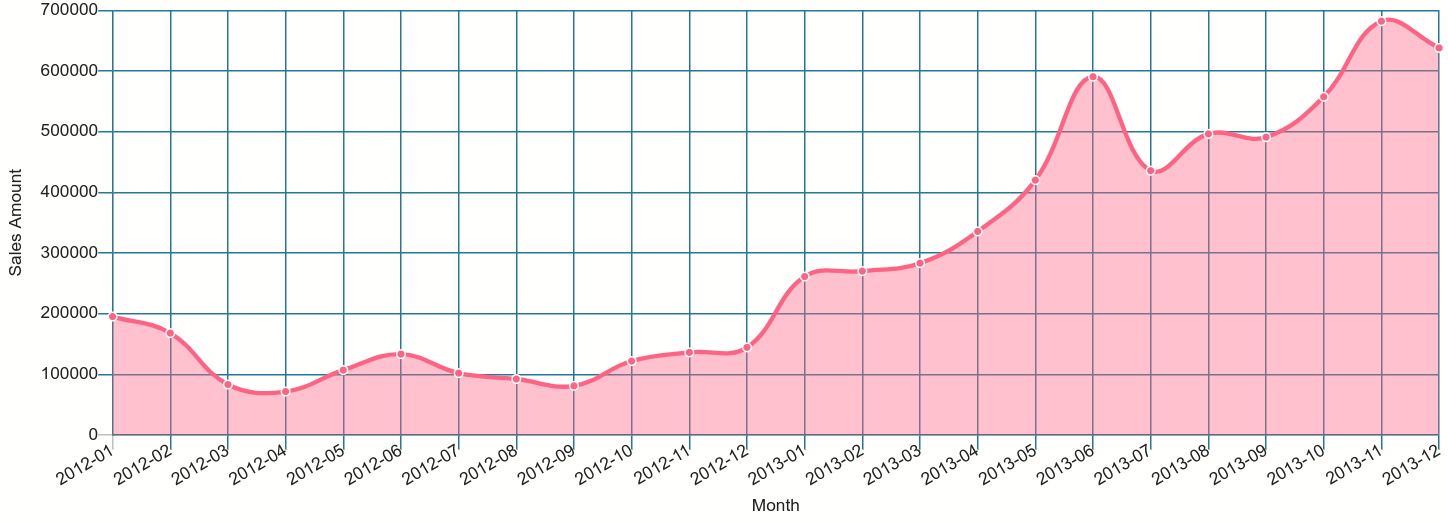

In [11]:
from IPython.display import Image
Image('SalesGrowth.png')

# Week 3

## Calculating % increase in sales from 2012 to 2013 in USA

In [52]:
select 
    cast(
        (
            sum(case when format(OrderDate, 'yyyy') = '2013' then SalesAmount else 0 end) - 
            sum(case when format(OrderDate, 'yyyy') = '2012' then SalesAmount else 0 end)
        ) / sum(case when format(OrderDate, 'yyyy') = '2012' then SalesAmount else 0 end) * 100
        as int
    )
    as [% increase in sales from 2012 to 2013]
from vUSASales

(1 row affected)

Total execution time: 00:00:00.694

% increase in sales from 2012 to 2013
280


## Analysing the factors driving the increase in sales

In [53]:
select 
    format(OrderDate, 'yyyy-MM') [Month], 
    sum(OrderQuantity) [Total order quantity],
    sum(SalesAmount) / sum(OrderQuantity) [Average price],
    count(distinct CustomerKey) [Number of customers],
    count(distinct ProductKey) [Number of products]
from vUSASales
group by format(OrderDate, 'yyyy-MM')
order by format(OrderDate, 'yyyy-MM')

(24 rows affected)

Total execution time: 00:00:00.380

Month,Total order quantity,Average price,Number of customers,Number of products
2012-01,101,1933.6575,101,25
2012-02,85,1976.5332,85,21
2012-03,54,1542.4967,54,27
2012-04,45,1593.3773,45,24
2012-05,64,1672.8459,64,24
2012-06,82,1626.8423,82,27
2012-07,63,1620.3911,63,25
2012-08,61,1513.9451,61,30
2012-09,52,1559.3462,52,21
2012-10,82,1487.4890,82,28


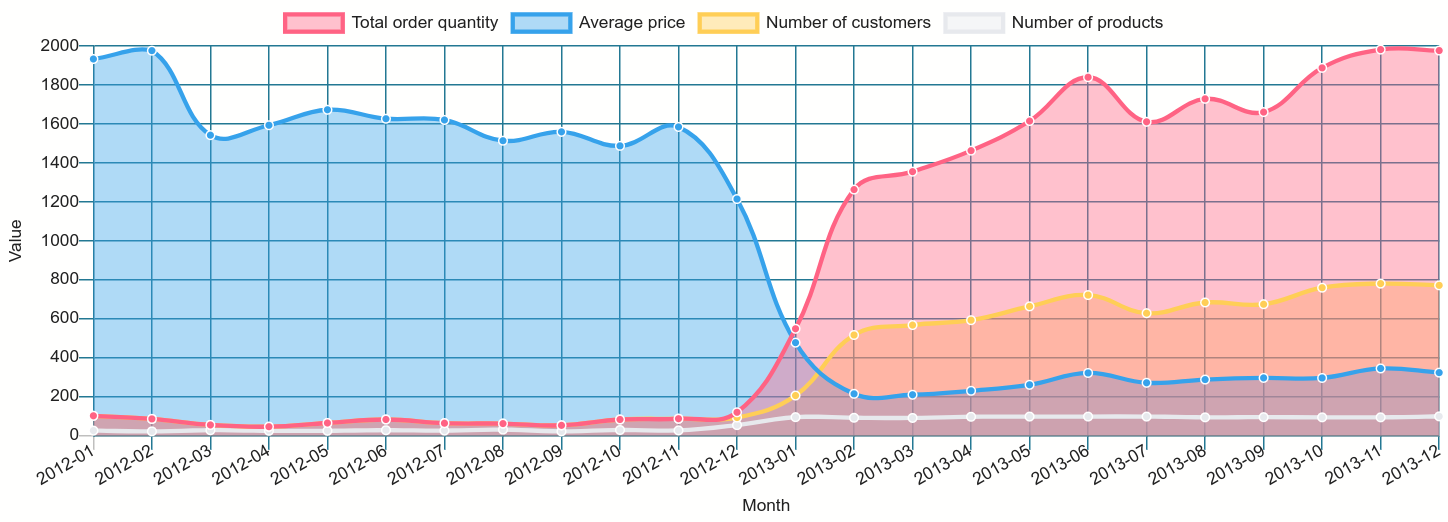

In [12]:
from IPython.display import Image
Image('SalesGrowthFactors.png')

## Normalising the effects of various factors

In [41]:
with monthly as (
    select 
        format(OrderDate, 'yyyy-MM') [Month],
        sum(SalesAmount) [Total sales amount],
        sum(OrderQuantity) [Total order quantity],
        sum(SalesAmount) / sum(OrderQuantity) [Average price],
        count(distinct CustomerKey) [Number of customers],
        count(distinct ProductKey) [Number of products]
    from vUSASales
    group by format(OrderDate, 'yyyy-MM')
)
select 
    Month,
    cast([Total order quantity] as float) / (select top 1 [Total order quantity] from monthly order by Month) [Normalised total order quantity],
    cast([Total sales amount] as float) / (select top 1 [Total sales amount] from monthly order by Month) [Normalised total sales amount],
    cast([Average price] as float) / (select top 1 [Average price] from monthly order by Month) [Normalised average price],
    cast([Number of customers] as float) / (select top 1 [Number of customers] from monthly order by Month) [Normalised number of customers],
    cast([Number of products] as float) / (select top 1 [Number of products] from monthly order by Month) [Normalised number of products]
from monthly
order by Month

(24 rows affected)

Total execution time: 00:00:02.166

Month,Normalised total order quantity,Normalised total sales amount,Normalised average price,Normalised number of customers,Normalised number of products
2012-01,1,1,1,1,1
2012-02,0.8415841584158416,0.8602448846834092,1.0221733683447043,0.8415841584158416,0.84
2012-03,0.5346534653465347,0.4264980679865561,0.7977093668346126,0.5346534653465347,1.08
2012-04,0.44554455445544555,0.36713874037393823,0.8240225065710965,0.44554455445544555,0.96
2012-05,0.6336633663366337,0.5481948744410335,0.8651200639203168,0.6336633663366337,0.96
2012-06,0.8118811881188119,0.6830592521777794,0.8413290874935194,0.8118811881188119,1.08
2012-07,0.6237623762376238,0.5227083693287043,0.8379928193074524,0.6237623762376238,1
2012-08,0.6039603960396039,0.4728670117374349,0.7829437736517454,0.6039603960396039,1.2
2012-09,0.5148514851485149,0.41518816020799865,0.8064231643918326,0.5148514851485149,0.84
2012-10,0.8118811881188119,0.624549239438745,0.76926187807303,0.8118811881188119,1.12


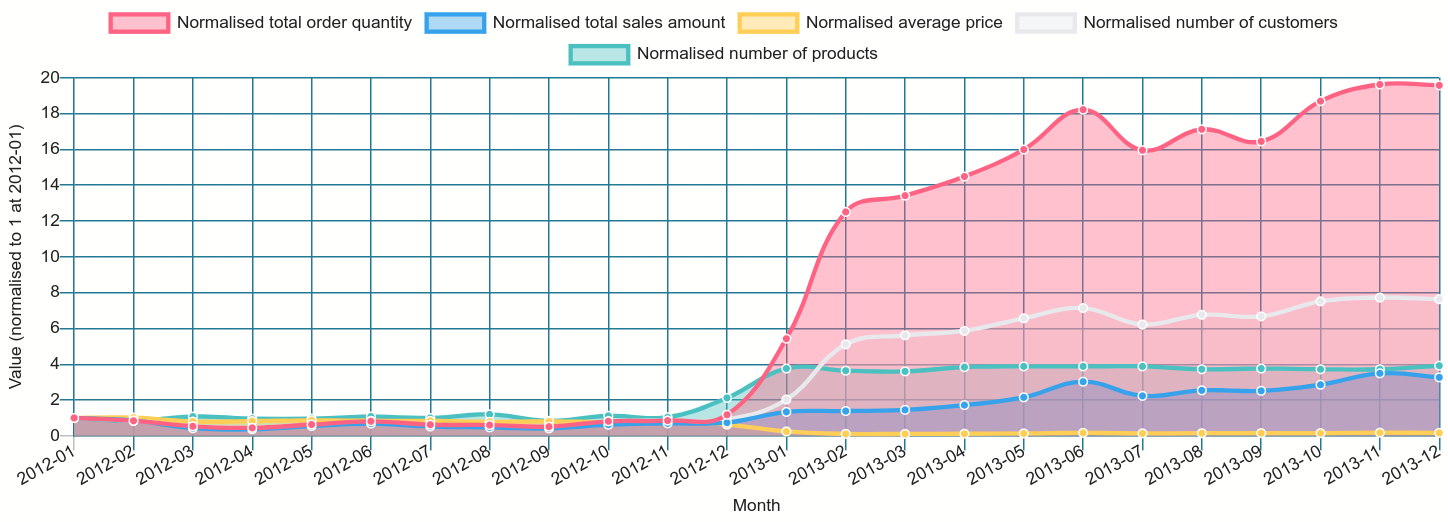

In [13]:
from IPython.display import Image
Image('SalesGrowthFactorsNormalised.png')

## Looking at sales across different geographical hierarchies

In [55]:
select top 10 * from vSalesByTerritory

(10 rows affected)

Total execution time: 00:00:00.008

OrderDate,SalesAmount,StateProvinceName,City,CustomerKey,UnitPrice,OrderQuantity,ProductKey,SalesTerritoryGroup,SalesTerritoryCountry,SalesTerritoryRegion
2012-01-01,1000.4375,Seine Saint Denis,Bobigny,16942,1000.4375,1,381,Europe,France,France
2012-01-01,2181.5625,Saarland,Stuttgart,15114,2181.5625,1,375,Europe,Germany,Germany
2012-01-01,2443.3500,Hessen,Kassel,15116,2443.3500,1,369,Europe,Germany,Germany
2012-01-01,782.9900,England,London,20576,782.9900,1,337,Europe,United Kingdom,United Kingdom
2012-01-01,2443.3500,California,Colma,13059,2443.3500,1,370,North America,United States,Southwest
2012-01-01,2443.3500,Washington,Bremerton,13085,2443.3500,1,370,North America,United States,Northwest
2012-01-01,2071.4196,British Columbia,Shawnee,20186,2071.4196,1,352,North America,Canada,Canada
2012-01-01,782.9900,California,Berkeley,15199,782.9900,1,337,North America,United States,Southwest
2012-01-01,2181.5625,Queensland,Gold Coast,21200,2181.5625,1,377,Pacific,Australia,Australia
2012-01-02,1000.4375,England,London,19172,1000.4375,1,387,Europe,United Kingdom,United Kingdom


### Sales by territory group

In [59]:
select distinct SalesTerritoryGroup from vSalesByTerritory 

(3 rows affected)

Total execution time: 00:00:00.098

SalesTerritoryGroup
North America
Pacific
Europe


In [73]:
with t as (
    select
        SalesTerritoryGroup,
        format(OrderDate, 'yyyy-MM') [Month], 
        sum(SalesAmount) [Sales Amount]
    from vSalesByTerritory
    group by SalesTerritoryGroup, format(OrderDate, 'yyyy-MM')
)
select 
    Month, [North America], [Pacific], [Europe]
from t
pivot (
    sum([Sales Amount]) 
    for SalesTerritoryGroup in ([North America], [Pacific], [Europe])
) as t2
order by Month

(24 rows affected)

Total execution time: 00:00:00.598

Month,North America,Pacific,Europe
2012-01,247346.2280,123772.2116,124245.6865
2012-02,233180.4565,141017.3504,132796.3807
2012-03,101495.5713,131532.2550,140455.1791
2012-04,96472.2970,177600.6004,126262.7171
2012-05,116293.1710,110918.7552,131665.9645
2012-06,157259.1596,197292.6669,200608.3163
2012-07,118372.0542,190163.6195,136022.5544
2012-08,115218.7417,222513.7199,186184.9199
2012-09,105868.4734,194036.9249,186272.0519
2012-10,141614.8075,215343.4535,178201.2236


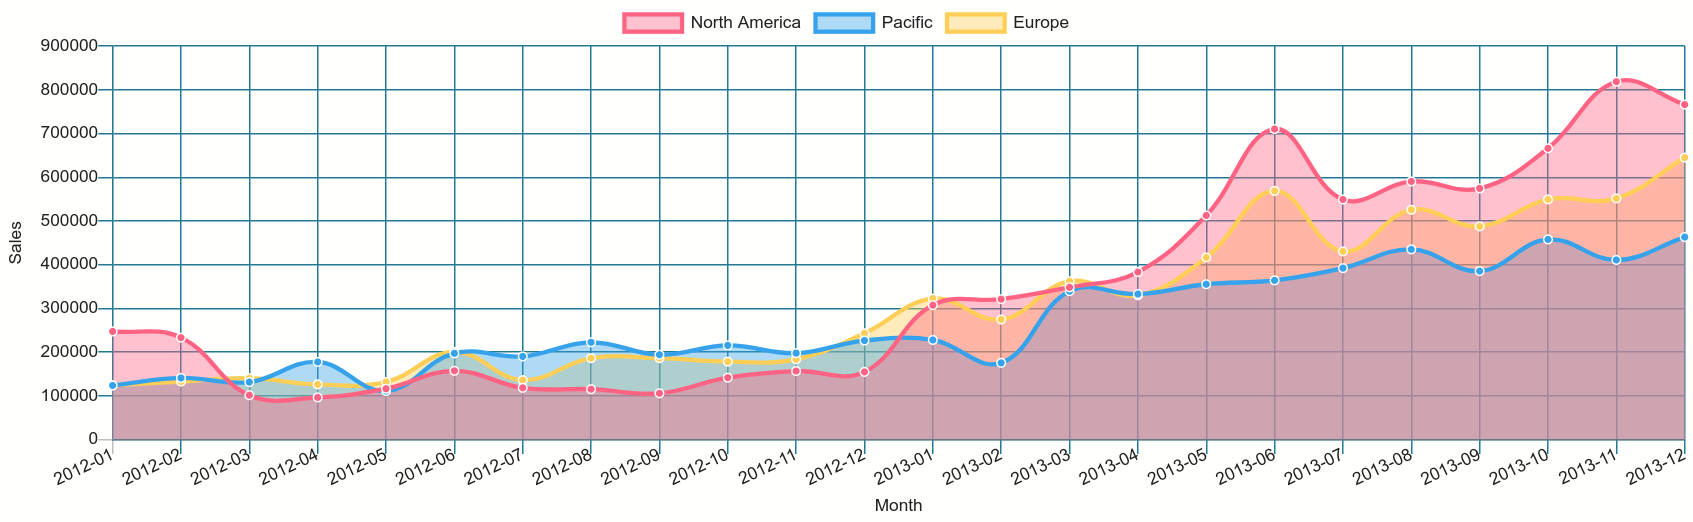

In [7]:
from IPython.display import Image
Image('SalesByTerritoryGroup.png')

### Sales by country

In [74]:
select distinct SalesTerritoryCountry from vSalesByTerritory 

(6 rows affected)

Total execution time: 00:00:00.064

SalesTerritoryCountry
Germany
United States
Australia
United Kingdom
Canada
France


In [75]:
with t as (
    select
        SalesTerritoryCountry,
        format(OrderDate, 'yyyy-MM') [Month], 
        sum(SalesAmount) [Sales Amount]
    from vSalesByTerritory
    group by SalesTerritoryCountry, format(OrderDate, 'yyyy-MM')
)
select 
    Month, [Germany], [United States], [Australia], [United Kingdom], [Canada], [France]
from t
pivot (
    sum([Sales Amount]) 
    for SalesTerritoryCountry in ([Germany], [United States], [Australia], [United Kingdom], [Canada], [France] )
) as t2
order by Month


(24 rows affected)

Total execution time: 00:00:00.612

Month,Germany,United States,Australia,United Kingdom,Canada,France
2012-01,35346.3510,195299.4174,123772.2116,46440.9377,52046.8106,42458.3978
2012-02,30997.6646,168005.3248,141017.3504,59408.5202,65175.1317,42390.1959
2012-03,38210.1574,83294.8242,131532.2550,54736.9851,18200.7471,47508.0366
2012-04,32049.2800,71701.9821,177600.6004,49450.1330,24770.3149,44763.3041
2012-05,52504.4104,107062.1396,110918.7552,52197.7970,9231.0314,26963.7571
2012-06,51589.3726,133401.0740,197292.6669,69652.6836,23858.0856,79366.2601
2012-07,35733.8813,102084.6400,190163.6195,61743.9801,16287.4142,38544.6930
2012-08,69560.6821,92350.6519,222513.7199,69373.1333,22868.0898,47251.1045
2012-09,58824.9322,81086.0058,194036.9249,61303.3884,24782.4676,66143.7313
2012-10,68450.8676,121974.1026,215343.4535,51391.5712,19640.7049,58358.7848


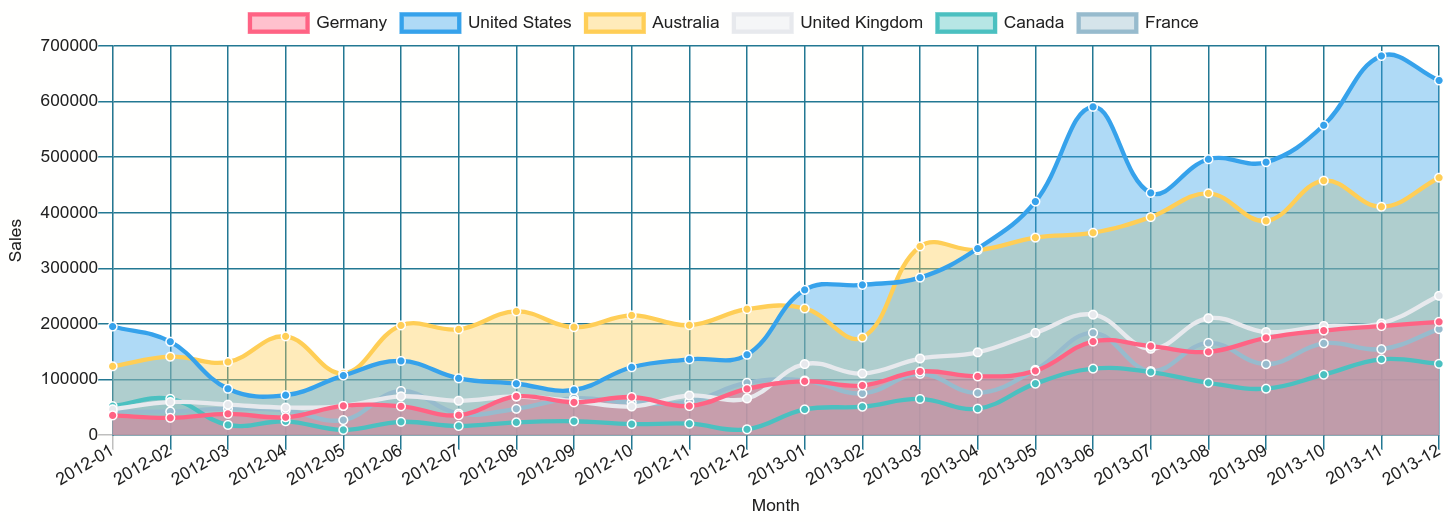

In [8]:
from IPython.display import Image
Image('SalesByCountry.png')

### Sales by region

In [81]:
select distinct SalesTerritoryCountry, SalesTerritoryRegion from vSalesByTerritory where SalesTerritoryCountry = 'United States'

(5 rows affected)

Total execution time: 00:00:00.040

SalesTerritoryCountry,SalesTerritoryRegion
United States,Central
United States,Northeast
United States,Northwest
United States,Southeast
United States,Southwest


In [7]:
with t as (
    select
        SalesTerritoryRegion,
        format(OrderDate, 'yyyy-MM') [Month], 
        sum(SalesAmount) [Sales Amount]
    from vSalesByTerritory
    where SalesTerritoryCountry = 'United States'
    group by SalesTerritoryRegion, format(OrderDate, 'yyyy-MM')
)
select 
    Month,
    coalesce([Northeast], 0) Northeast,
    coalesce([Northwest], 0) Northwest,
    coalesce([Southeast], 0) Southeast,
    coalesce([Southwest], 0) Southwest,
    coalesce([Central], 0) Central
from t
pivot (
    sum([Sales Amount]) 
    for SalesTerritoryRegion in ([Northeast], [Northwest], [Southeast], [Southwest], [Central])
) as t2
order by Month


(24 rows affected)

Total execution time: 00:00:00.192

Month,Northeast,Northwest,Southeast,Southwest,Central
2012-01,0.0000,91297.0038,782.9900,103219.4236,0.0000
2012-02,0.0000,77551.7726,0.0000,90453.5522,0.0000
2012-03,0.0000,35506.0122,0.0000,47788.8120,0.0000
2012-04,0.0000,30368.6884,0.0000,41333.2937,0.0000
2012-05,0.0000,50329.2173,0.0000,56732.9223,0.0000
2012-06,0.0000,49316.7311,782.9900,83301.3529,0.0000
2012-07,0.0000,46208.1140,0.0000,55876.5260,0.0000
2012-08,0.0000,35558.6716,0.0000,56791.9803,0.0000
2012-09,0.0000,40966.8769,0.0000,40119.1289,0.0000
2012-10,0.0000,64976.9099,0.0000,56997.1927,0.0000


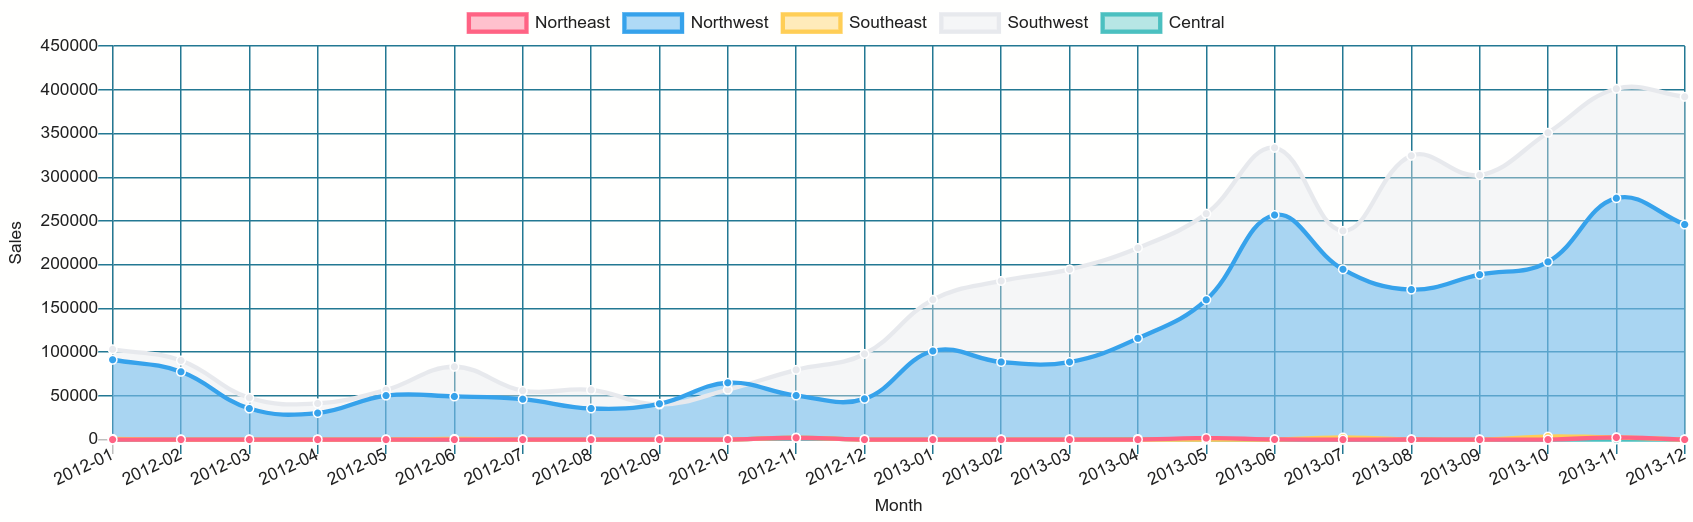

In [10]:
from IPython.display import Image
Image('SalesByRegion.png')